In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
svm_data = pd.read_csv('../info/svmdata_e.txt', sep='\t')
svm_data_test = pd.read_csv('../info/svmdata_e_test.txt', sep='\t')

In [3]:
svm_data.head()

,X1,X2,Colors
1,-0.481785,0.547612,red
2,-0.284473,0.835821,red
3,-0.324098,0.976975,red
4,-0.078877,0.363042,red
5,-0.021214,0.804514,red


In [4]:
len(svm_data), len(svm_data_test)

(120, 120)

<Axes: xlabel='X1', ylabel='X2'>

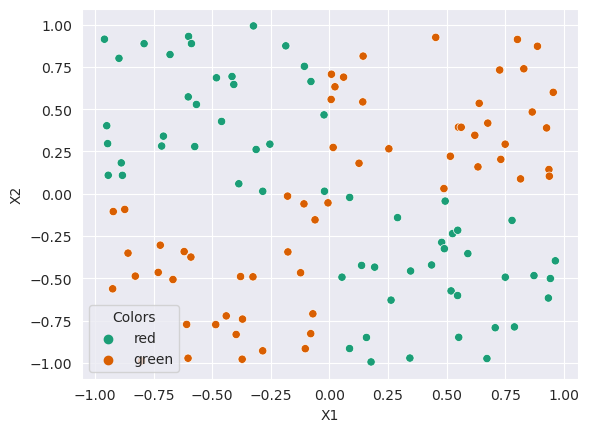

In [5]:
sns.scatterplot(data=svm_data_test, x='X1', y='X2', hue='Colors', palette='Dark2')

<Axes: xlabel='X1', ylabel='X2'>

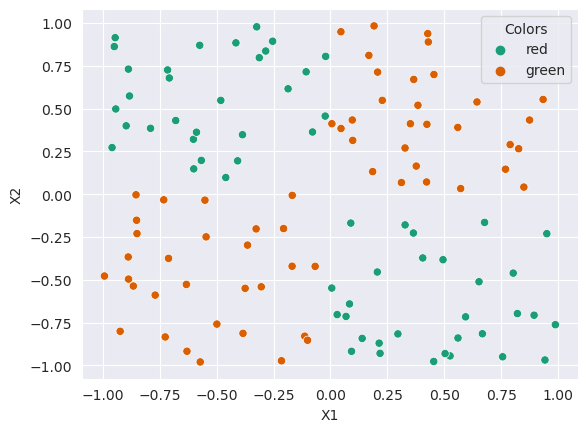

In [6]:
sns.scatterplot(data=svm_data, x='X1', y='X2', hue='Colors', palette='Dark2')

In [7]:
svm_data['Colors'] = svm_data['Colors'].map({'red': 0, 'green': 1})
svm_data_test['Colors'] = svm_data_test['Colors'].map({'red': 0, 'green': 1})

In [8]:
X_train, X_test, y_train, y_test = svm_data.drop('Colors', axis=1), svm_data_test.drop('Colors', axis=1), svm_data['Colors'], svm_data_test['Colors']

In [9]:
from sklearn.svm import SVC, LinearSVC

In [10]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

[60 60]
              precision    recall  f1-score   support

           0       0.78      0.47      0.58        60
           1       0.62      0.87      0.72        60

    accuracy                           0.67       120
   macro avg       0.70      0.67      0.65       120
weighted avg       0.70      0.67      0.65       120

              precision    recall  f1-score   support

           0       0.74      0.47      0.57        60
           1       0.61      0.83      0.70        60

    accuracy                           0.65       120
   macro avg       0.67      0.65      0.64       120
weighted avg       0.67      0.65      0.64       120


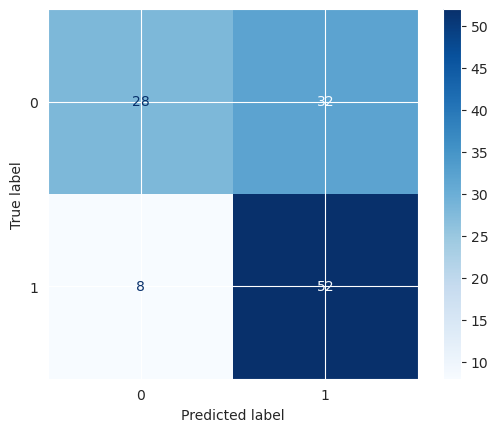

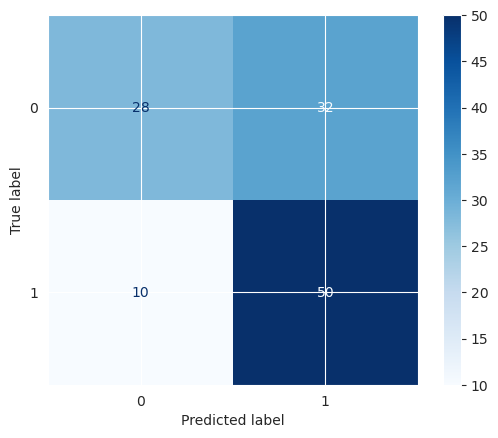

In [13]:
print(clf.n_support_)
print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred))
train_matrix = ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, cmap='Blues')
train_matrix.figure_.savefig('train.png')
#RocCurveDisplay.from_estimator(clf, X_train, y_train, color='yellow');
test_matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
test_matrix.figure_.savefig('test.png')
#RocCurveDisplay.from_estimator(clf, X_test, y_test, color='yellow');

In [14]:
# from sklearn.inspection import DecisionBoundaryDisplay
# 
# gamma = 100
# models = (
#     SVC(kernel="linear"),
#     SVC(kernel="rbf", gamma=gamma),
#     SVC(kernel="sigmoid", gamma=gamma),
#     SVC(kernel="poly", degree=1, gamma=gamma),
#     SVC(kernel="poly", degree=2, gamma=gamma),
#     SVC(kernel="poly", degree=3, gamma=gamma),
#     SVC(kernel="poly", degree=4, gamma=gamma),
#     SVC(kernel="poly", degree=5, gamma=gamma),
# 
# )
# models = (clf.fit(X_train, y_train) for clf in models)
# 
# # title for the plots
# titles = (
#     "SVC with linear kernel",
#     "SVC with RBF kernel",
#     "SVC with Sigmoid kernel",
#     "SVC with polynomial (degree 1) kernel",
#     "SVC with polynomial (degree 2) kernel",
#     "SVC with polynomial (degree 3) kernel",
#     "SVC with polynomial (degree 4) kernel",
#     "SVC with polynomial (degree 5) kernel"
# )
# 
# fig, sub = plt.subplots(4, 2, figsize=(10, 8), dpi=200)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
# X0, X1 = X_train['X1'], X_train['X2']
# 
# for clf, title, ax in zip(models, titles, sub.flatten()):
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf,
#         X_train,
#         response_method="predict",
#         cmap=plt.cm.coolwarm,
#         alpha=0.8,
#         ax=ax,
#         xlabel='X1',
#         ylabel='X2',
#     )
#     ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)
# fig.savefig('svc1.png')

In [15]:
rbf_svm = SVC(gamma=200, C = 1000000)

In [16]:
rbf_svm.fit(X_train, y_train)

SVC(C=1000000, gamma=200)

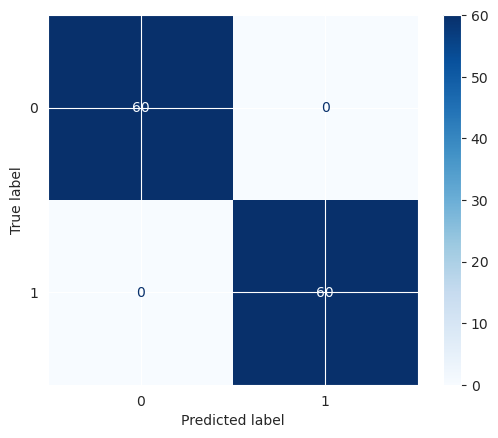

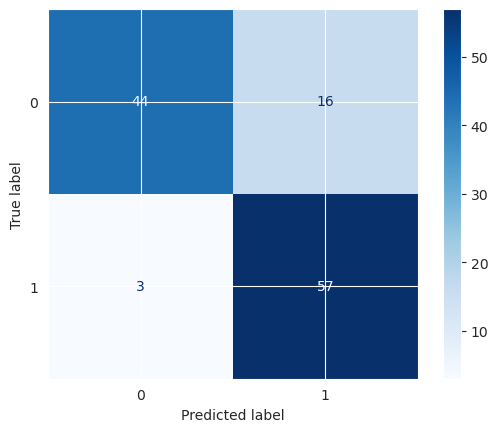

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
train_matrix_rbf = ConfusionMatrixDisplay.from_estimator(rbf_svm, X_train, y_train, cmap='Blues')
train_matrix_rbf.figure_.savefig('train_matrix_rbf.png')
test_matrix_rbf = ConfusionMatrixDisplay.from_estimator(rbf_svm, X_test, y_test, cmap='Blues')
test_matrix_rbf.figure_.savefig('test_matrix_rbf.png')

In [28]:
# CODE SOURCE IS DIRECTLY FROM DOCUMENTATION
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def plot_svm_boundary(model,X,y, name):
    
    X = X.values
    y = y.values
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none')
    plt.savefig(f'{name}.png')
    plt.show()

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


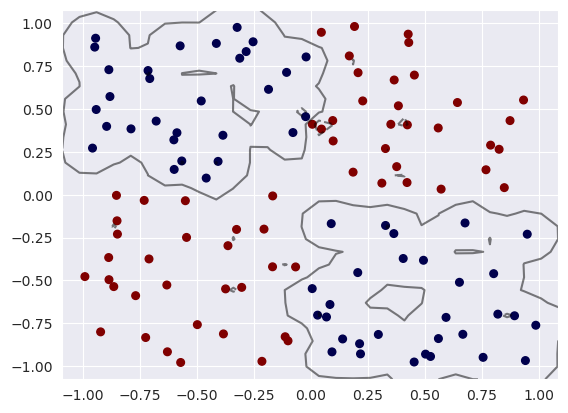

In [29]:
plot_svm_boundary(rbf_svm, X_train, y_train, 'train')

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


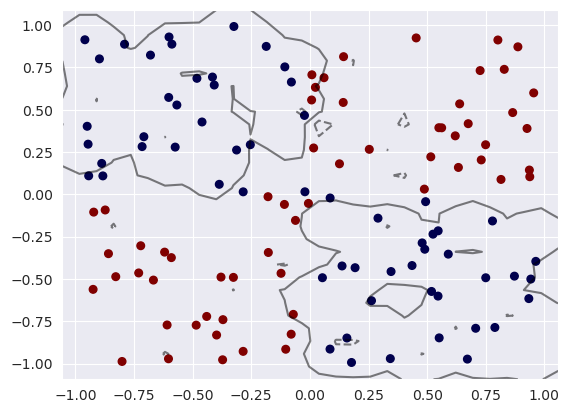

In [30]:
plot_svm_boundary(rbf_svm, X_test, y_test, 'test')

[59 59]


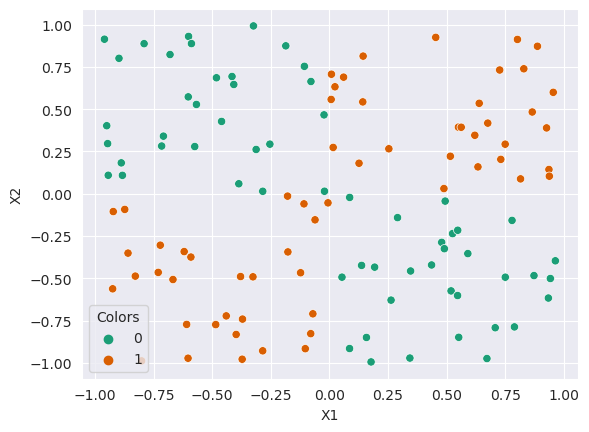

In [40]:
sns.scatterplot(data=svm_data_test, x='X1', y='X2', hue='Colors', palette='Dark2')
print(rbf_svm.n_support_)

In [37]:
# ax[0, 0].set_title('Accuracy score')
# ax[0, 0].plot(test_range, accuracy_scores, color='olive')
# ax[0, 0].set_xlabel('test_size')
# ax[0, 0].set_ylabel('accuracy')
gamma= 500000
C = 100000000
sigm_model = SVC(kernel='sigmoid', gamma=gamma, C=C)
sigm_model.fit(X_train, y_train)

SVC(C=100000000, gamma=500000, kernel='sigmoid')

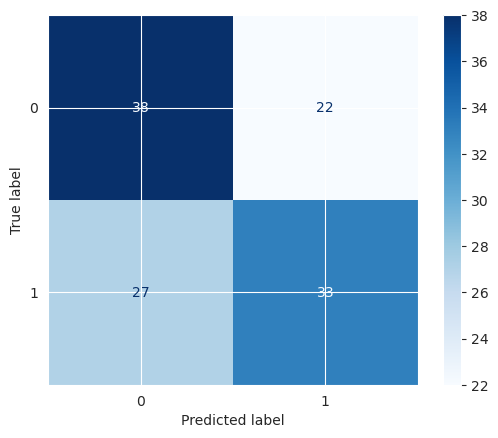

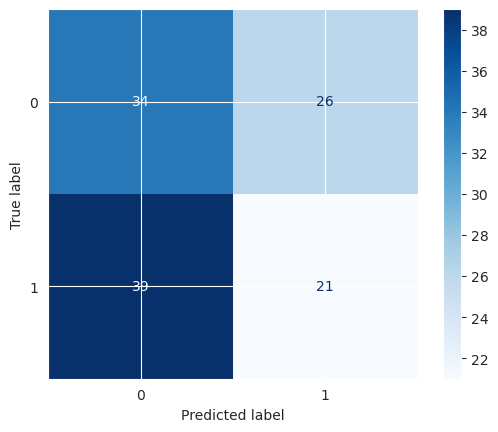

In [38]:
train_matrix_sigm = ConfusionMatrixDisplay.from_estimator(sigm_model, X_train, y_train, cmap='Blues')
train_matrix_sigm.figure_.savefig('train_matrix_sigm.png')
test_matrix_sigm = ConfusionMatrixDisplay.from_estimator(sigm_model, X_test, y_test, cmap='Blues')
test_matrix_sigm.figure_.savefig('test_matrix_sigm.png')

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


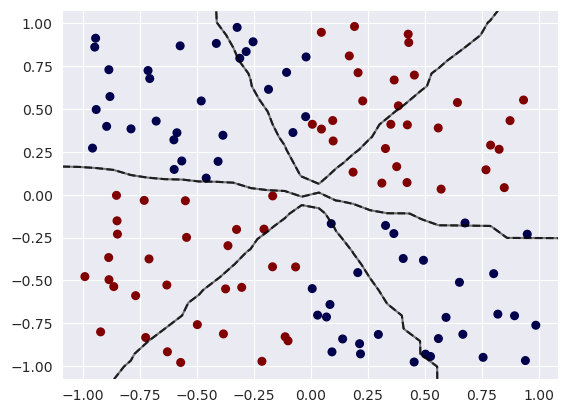

In [31]:
plot_svm_boundary(sigm_model, X_train, y_train, 'sigm_train')

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


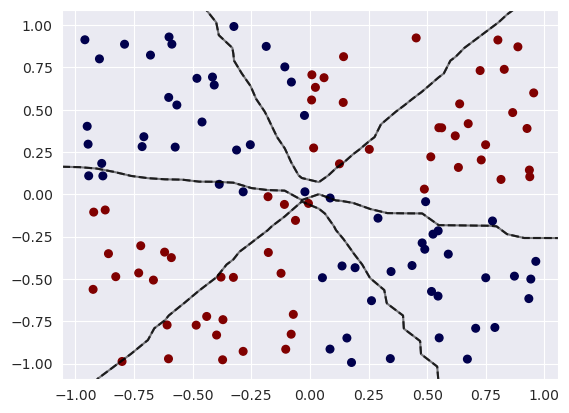

In [32]:
plot_svm_boundary(sigm_model, X_test, y_test, 'sigm_test')

In [39]:
sigm_model.n_support_

array([27, 27], dtype=int32)

In [56]:
gamma= 50
C = 1000
poly_model = SVC(kernel='poly', gamma=gamma, C=C, degree=2)
poly_model.fit(X_train, y_train)


SVC(C=1000, degree=2, gamma=50, kernel='poly')

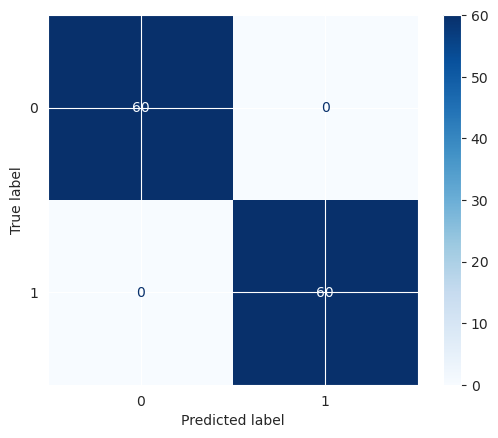

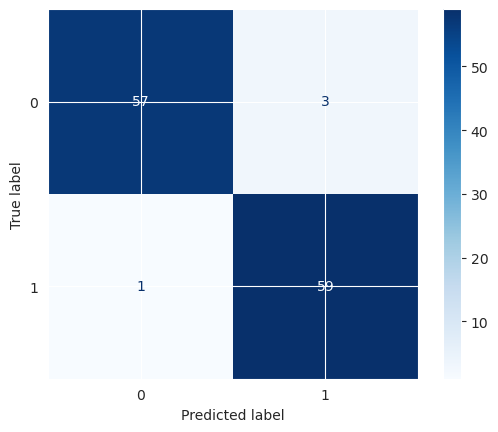

In [57]:
train_matrix_poly2 = ConfusionMatrixDisplay.from_estimator(poly_model, X_train, y_train, cmap='Blues')
train_matrix_poly2.figure_.savefig('train_matrix_poly2.png')
test_matrix_poly2= ConfusionMatrixDisplay.from_estimator(poly_model, X_test, y_test, cmap='Blues')
test_matrix_poly2.figure_.savefig('test_matrix_poly2.png')

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


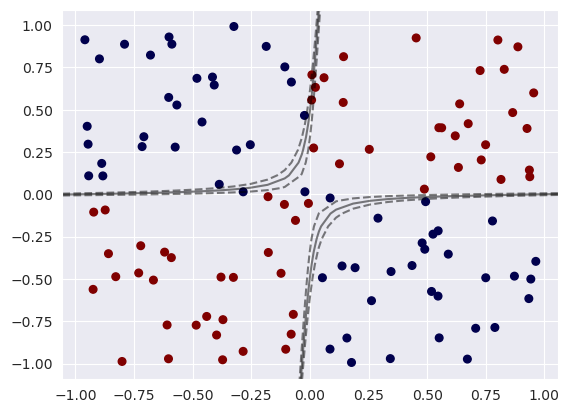

In [58]:
plot_svm_boundary(poly_model, X_test, y_test, 'poly2')

In [69]:
gamma= 50
C = 1000
poly_model3 = SVC(kernel='poly', gamma=gamma, C=C, degree=3)
poly_model3.fit(X_train, y_train)

SVC(C=1000, gamma=50, kernel='poly')

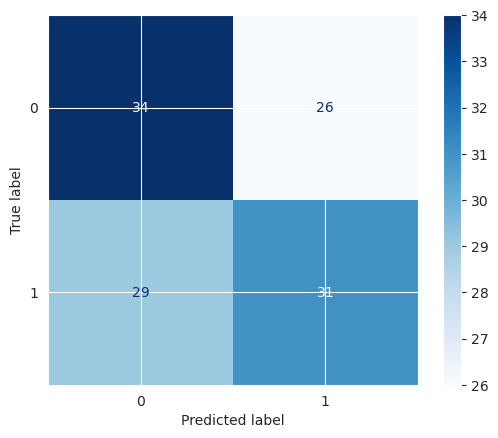

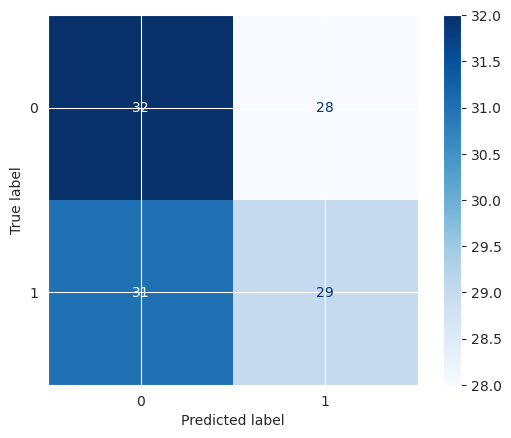

In [70]:
train_matrix_poly3 = ConfusionMatrixDisplay.from_estimator(poly_model3, X_train, y_train, cmap='Blues')
train_matrix_poly3.figure_.savefig('train_matrix_poly3.png')
test_matrix_poly3= ConfusionMatrixDisplay.from_estimator(poly_model3, X_test, y_test, cmap='Blues')
test_matrix_poly3.figure_.savefig('test_matrix_poly3.png')

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


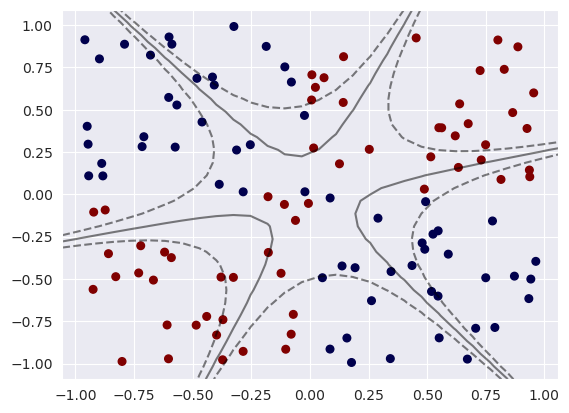

In [72]:
plot_svm_boundary(poly_model3, X_test, y_test, 'poly3')

In [66]:
gamma= 50000
C = 1000000
poly_model = SVC(kernel='poly', gamma=gamma, C=C, degree=4)
poly_model.fit(X_train, y_train)

SVC(C=1000000, degree=4, gamma=50000, kernel='poly')

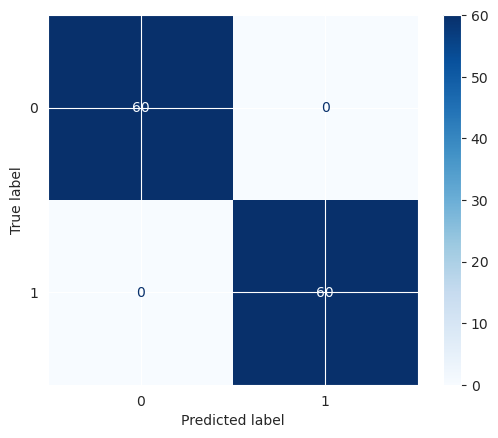

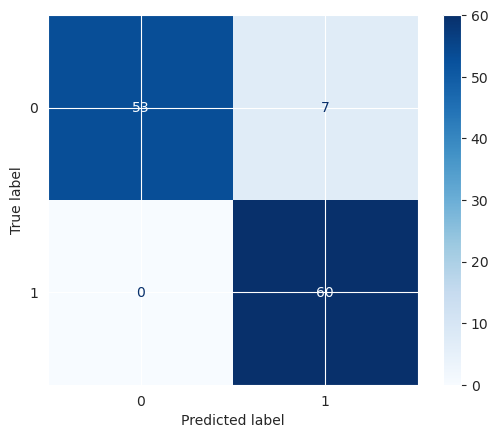

In [67]:
train_matrix_poly4 = ConfusionMatrixDisplay.from_estimator(poly_model, X_train, y_train, cmap='Blues')
train_matrix_poly4.figure_.savefig('train_matrix_poly4.png')
test_matrix_poly4= ConfusionMatrixDisplay.from_estimator(poly_model, X_test, y_test, cmap='Blues')
test_matrix_poly4.figure_.savefig('test_matrix_poly4.png')

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


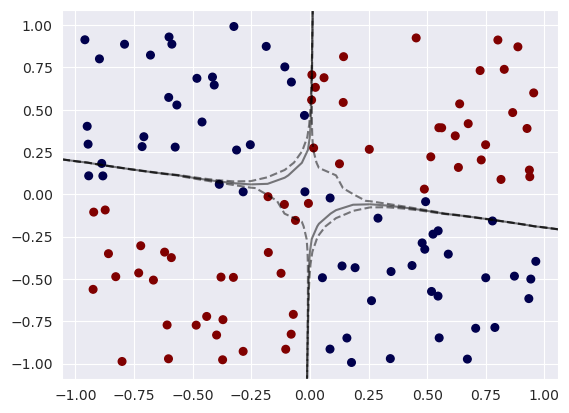

In [68]:
plot_svm_boundary(poly_model, X_test, y_test, 'poly4')

/home/serg/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


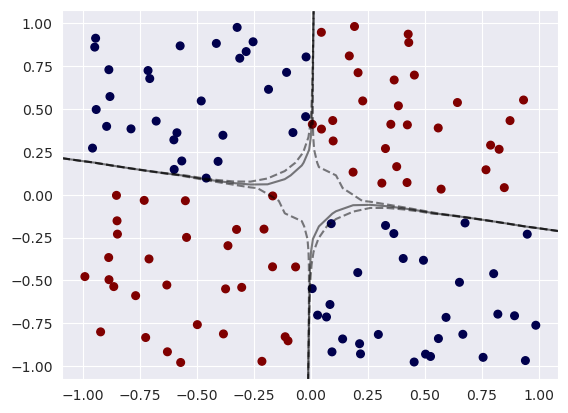

In [64]:
plot_svm_boundary(poly_model, X_train, y_train, 'poly4train')


In [65]:
poly_model.n_support_

array([2, 2], dtype=int32)